In [1]:
# Orbit comparisons
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics

from galpy.potential import MWPotential

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

## Initialisation

In [2]:
#Galpy internal units scaling factors
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)

gcname='Bootes III'
mass=1.82E7 * 5

#External potential
pot1 = MWPotential2014.copy()
pot2 = MWPotential2014.copy()
pot2[2]*= 2

# Orbit made from pace data
sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o_p = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o_p.turn_physical_off()

# Orbit made from SIMBAD data
o_s = Orbit.from_name(gcname, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25])
o_s.turn_physical_off()

In [30]:
# Integrate orbit of Boo3
tint = 5 # Integration time
delt = np.linspace(0,-tint/to,1000)
deltfwd = np.linspace(0, tint/to, 1000)

tint2 = 2.5
delt2 = np.linspace(0,-tint2/to,1000)
delt2fwd = np.linspace(0, tint2/to, 1000)


oint_p1 = o_p()
oint_p1.integrate(delt, pot=pot1)
ointfwd_p1 = o_p()
ointfwd_p1.integrate(deltfwd, pot=pot1)

oint_p2 = o_p()
oint_p2.integrate(delt, pot=pot2)
ointfwd_p2 = o_p()
ointfwd_p2.integrate(deltfwd, pot=pot2)

oint_s1 = o_s()
oint_s1.integrate(delt, pot=pot1)
ointfwd_s1 = o_s()
ointfwd_s1.integrate(deltfwd, pot=pot1)

oint_s2 = o_s()
oint_s2.integrate(delt, pot=pot2)
ointfwd_s2 = o_s()
ointfwd_s2.integrate(deltfwd, pot=pot2)

## Orbit for Pace data:
### MWPotential2014

Text(0, 0.5, 'Radius (kpc)')

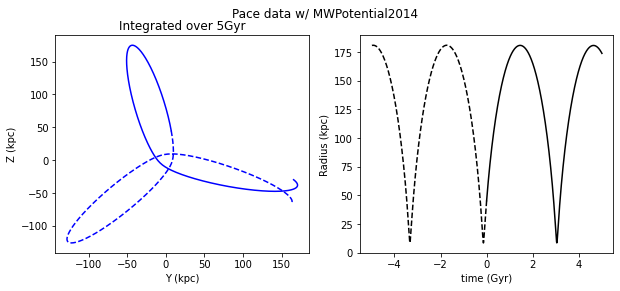

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Pace data w/ MWPotential2014')

# Orbit in Y-Z
ax1.plot(oint_p1.y(delt)*ro, oint_p1.z(delt)*ro, "b--")
ax1.plot(ointfwd_p1.y(deltfwd)*ro, ointfwd_p1.z(deltfwd)*ro, "b-")
ax1.set_xlabel('Y (kpc)')
ax1.set_ylabel('Z (kpc)')
ax1.set_title('Integrated over 5Gyr')

# Orbit radius vs. time
ax2.plot(delt*to, oint_p1.r(delt)*ro, "k--")
ax2.plot(deltfwd*to, ointfwd_p1.r(deltfwd)*ro, "k-")
ax2.set_xlabel('time (Gyr)')
ax2.set_ylabel('Radius (kpc)')

### MWPotential2014 with double mass

Text(0, 0.5, 'Radius (kpc)')

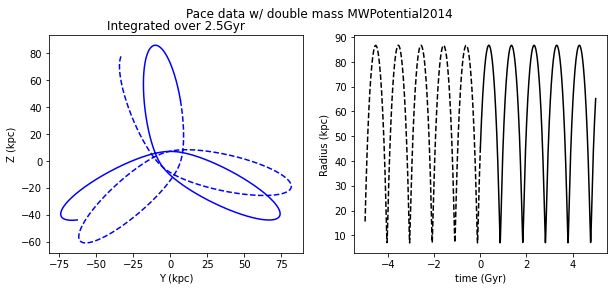

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Pace data w/ double mass MWPotential2014')


# Orbit in Y-Z
ax1.plot(oint_p2.y(delt2)*ro, oint_p2.z(delt2)*ro, "b--")
ax1.plot(ointfwd_p2.y(delt2fwd)*ro, ointfwd_p2.z(delt2fwd)*ro, "b-")
ax1.set_xlabel('Y (kpc)')
ax1.set_ylabel('Z (kpc)')
ax1.set_title('Integrated over 2.5Gyr')

# Orbit radius vs. time
ax2.plot(delt*to, oint_p2.r(delt)*ro, "k--")
ax2.plot(deltfwd*to, ointfwd_p2.r(deltfwd)*ro, "k-")
ax2.set_xlabel('time (Gyr)')
ax2.set_ylabel('Radius (kpc)')

## Orbit for SIMBAD data:
### MWPotential2014

Text(0, 0.5, 'Radius (kpc)')

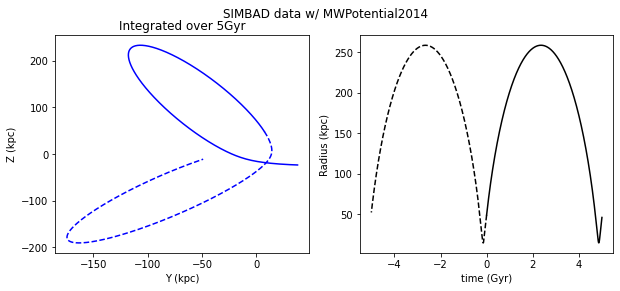

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('SIMBAD data w/ MWPotential2014')

# Orbit in Y-Z
ax1.plot(oint_s1.y(delt)*ro, oint_s1.z(delt)*ro, "b--")
ax1.plot(ointfwd_s1.y(deltfwd)*ro, ointfwd_s1.z(deltfwd)*ro, "b-")
ax1.set_xlabel('Y (kpc)')
ax1.set_ylabel('Z (kpc)')
ax1.set_title('Integrated over 5Gyr')

# Orbit radius vs. time
ax2.plot(delt*to, oint_s1.r(delt)*ro, "k--")
ax2.plot(deltfwd*to, ointfwd_s1.r(deltfwd)*ro, "k-")
ax2.set_xlabel('time (Gyr)')
ax2.set_ylabel('Radius (kpc)')

### MWPotential2014 with double mass

Text(0, 0.5, 'Radius (kpc)')

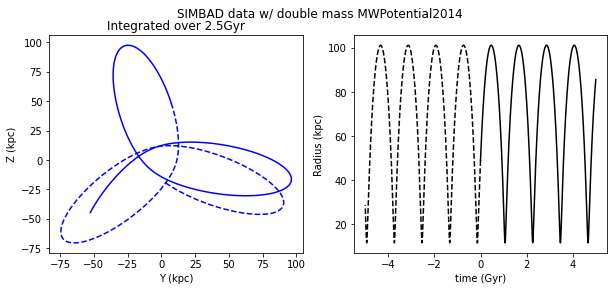

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('SIMBAD data w/ double mass MWPotential2014')

# Orbit in Y-Z
ax1.plot(oint_s2.y(delt2)*ro, oint_s2.z(delt2)*ro, "b--")
ax1.plot(ointfwd_s2.y(delt2fwd)*ro, ointfwd_s2.z(delt2fwd)*ro, "b-")
ax1.set_xlabel('Y (kpc)')
ax1.set_ylabel('Z (kpc)')
ax1.set_title('Integrated over 2.5Gyr')

# Orbit radius vs. time
ax2.plot(delt*to, oint_s2.r(delt)*ro, "k--")
ax2.plot(deltfwd*to, ointfwd_s2.r(deltfwd)*ro, "k-")
ax2.set_xlabel('time (Gyr)')
ax2.set_ylabel('Radius (kpc)')